In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.fftpack as fftpack 
import scipy.signal as signal

First I want to generate some white noise by sampling a gaussian of mean zero. I'll assume I'm sampling data at a rate of 1kHz for 10000 samples

In [10]:
Nsamples = 10000
fs = 1e3 #sampling rate
dt = 1/fs
B = 1/2/dt
t = np.arange(Nsamples)*dt

In [3]:
noise = np.random.randn(Nsamples)

In [27]:
autocorr = signal.correlate(noise, noise, mode='same')
print(autocorr.size)

10000


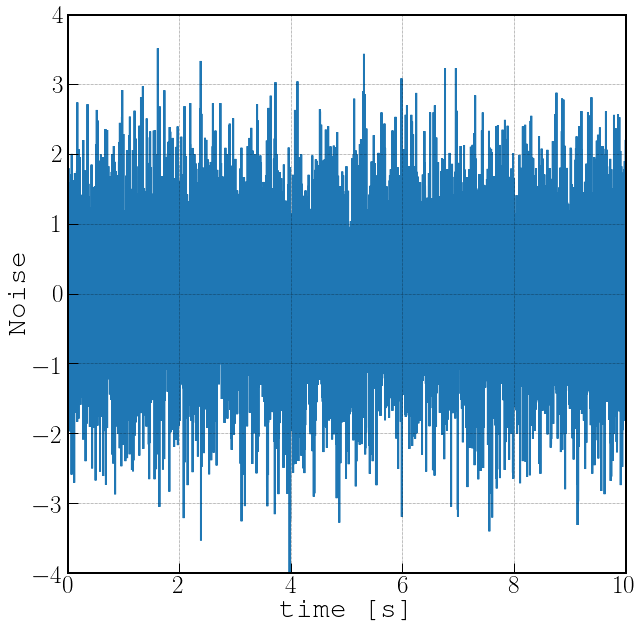

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, noise)
ax.axis([0,t[-1],-4,4])
ax.set_xlabel(r'time [s]')
ax.set_ylabel(rb'Noise')
ax.grid(which='both');

Take the fourier transform to see the noise spectrum that results

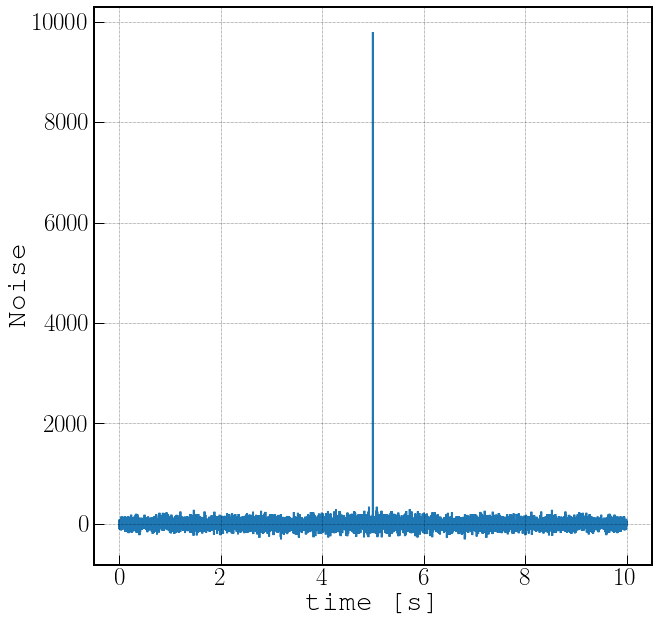

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, autocorr)
# ax.axis([0,t[-1],-4,4])
ax.set_xlabel(r'time [s]')
ax.set_ylabel(r'Noise')
ax.grid(which='both');

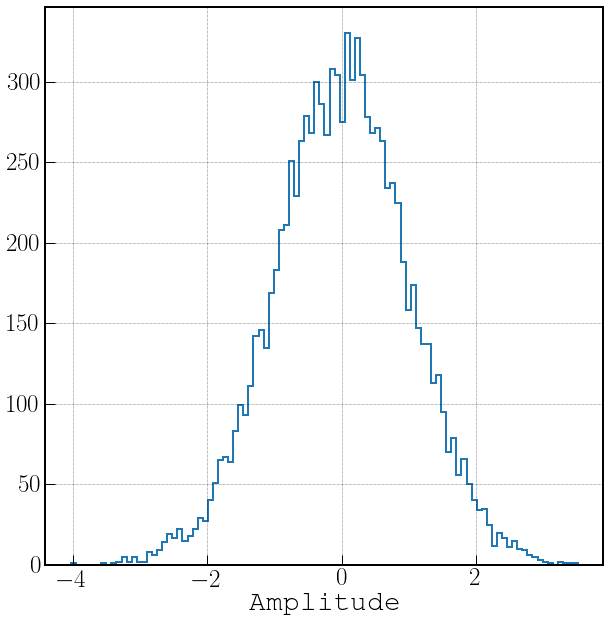

In [5]:
# hist, bins = np.histogram(noise, bins=100, normed=True)
fig,ax = plt.subplots(figsize=(10,10))
ax.hist(noise, bins=100, normed=False, histtype='step', linewidth=2);
ax.set_xlabel(r'Amplitude');
ax.grid(which='both');

In [79]:
noisefft = fftpack.fft(noise)*dt
noisepsd = fftpack.fft(autocorr)*dt
freq = fftpack.fftfreq(Nsamples, dt)
freq = fftpack.fftshift(freq)

f, psd = signal.welch(noise, fs=fs, scaling='spectrum')

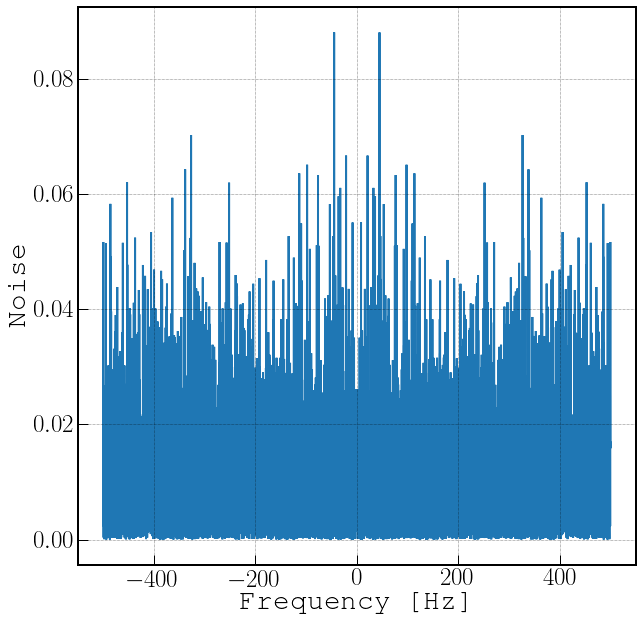

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(freq, np.abs(noisefft)**2)
# ax.axis([0,Nsamples,-3,3])
ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel(r'Noise')
ax.grid(which='both');

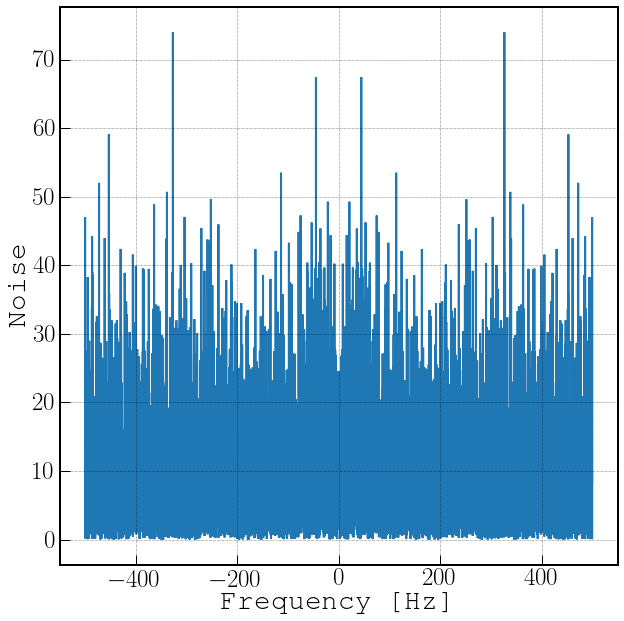

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(freq, np.abs(noisepsd))
# ax.axis([0,Nsamples,-3,3])
ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel(r'Noise')
ax.grid(which='both');

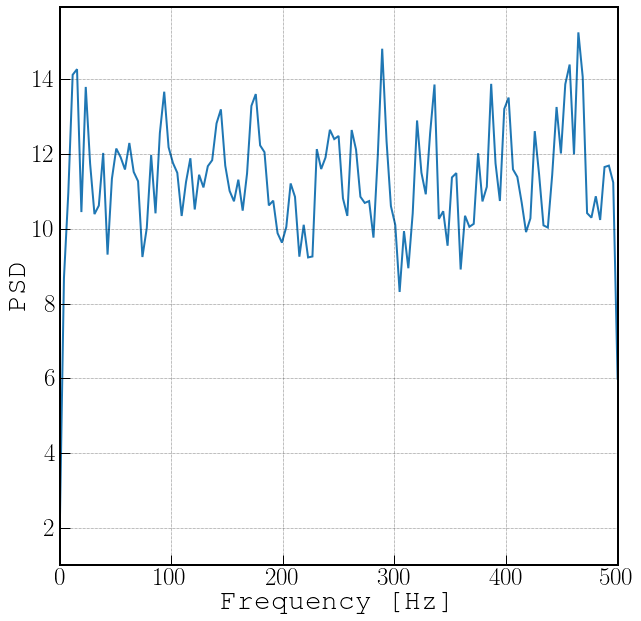

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f, psd/dt)
# ax.plot(f, [0.011]*len(f))
ax.set_xlim(0, B)
ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel(r'PSD')
ax.grid(which='both');

In [54]:
#Let's do a random walk
rw = np.cumsum(noise)

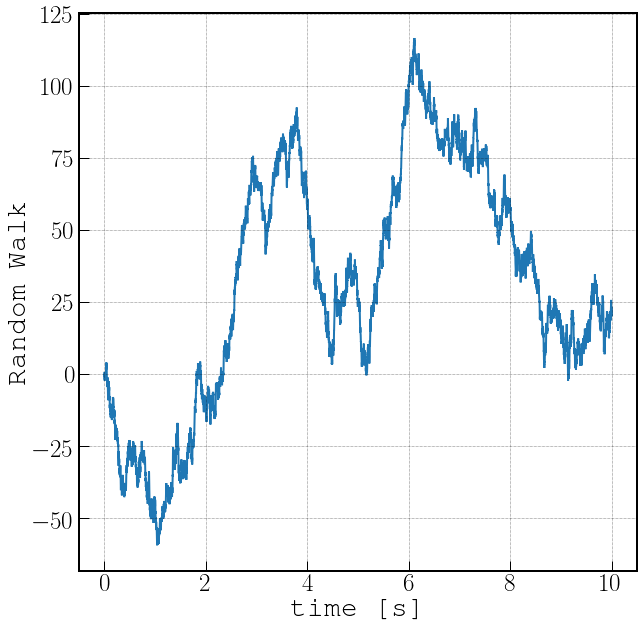

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, rw)
# ax.axis([0,t[-1],-4,4])
ax.set_xlabel(r'time [s]')
ax.set_ylabel(r'Random Walk')
ax.grid(which='both');

In [58]:
rw_autocorr = signal.correlate(rw, rw, mode='same')
rwfft = fftpack.fft(rw)*t[-1]/Nsamples
rwpsd = fftpack.fft(autocorr)*(t[-1]/Nsamples)**2
freq = fftpack.fftfreq(Nsamples, dt)
freq = fftpack.fftshift(freq)

rw_f, rw_psd = signal.welch(rw, fs=fs, scaling='spectrum')

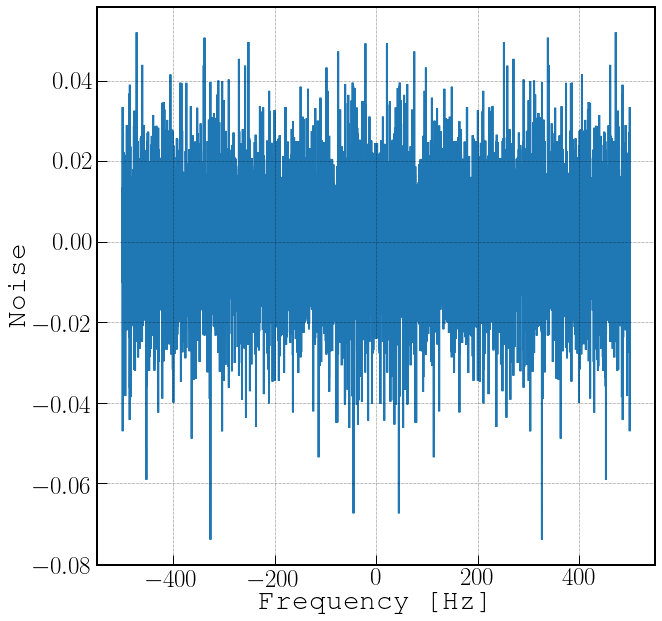

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(freq, np.real(rwpsd))
# ax.axis([0,Nsamples,-3,3])
ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel(r'Noise')
ax.grid(which='both');

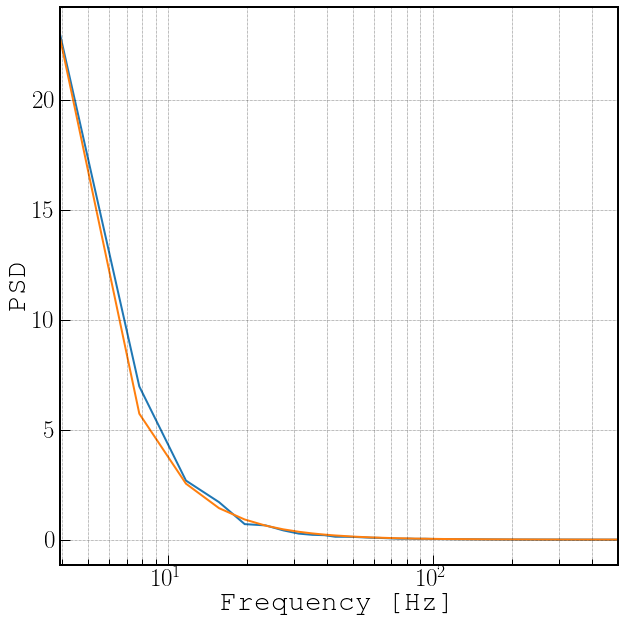

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
ax.semilogx(f, rw_psd)
ax.semilogx(f[1:], 350/f[1:]**2)
ax.set_xlim(0, B)
ax.set_xlabel(r'Frequency [Hz]')
ax.set_ylabel(r'PSD')
ax.grid(which='both');